# A notebook to test ping.py
and to analyze them further

In [5]:
import scipy as sp
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import os
import re as re
import matplotlib.patches as mpatches
import pandas as pd

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from theagamma.ping import ping_coupling
from theoc.oc import load_result

%load_ext lab_black
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
file_name = "../data/test_ping.pkl"

In [7]:
ping_coupling(
    num_pop=25000,
    num_stim=250,
    p_stim=0.2,
    stim_mode="drift",
    file_name=file_name,
    output=False,
)

clang: warning: libstdc++ is deprecated; move to libc++ with a minimum deployment target of OS X 10.9 [-Wdeprecated]
ld: library not found for -lstdc++
clang: error: linker command failed with exit code 1 (use -v to see invocation)
WARNING    Cannot use Cython, a test compilation failed: command 'g++' failed with exit status 1 (LinkError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       No numerical integration method specified for group 'neurongroup_1', using method 'euler' (took 0.15s, trying other methods took 0.22s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup', using method 'euler' (took 0.01s, tryin

[                                        ----------------------------------------


In [9]:
result = load_result(file_name)

Text(0.5, 1.0, 'Stimulus')

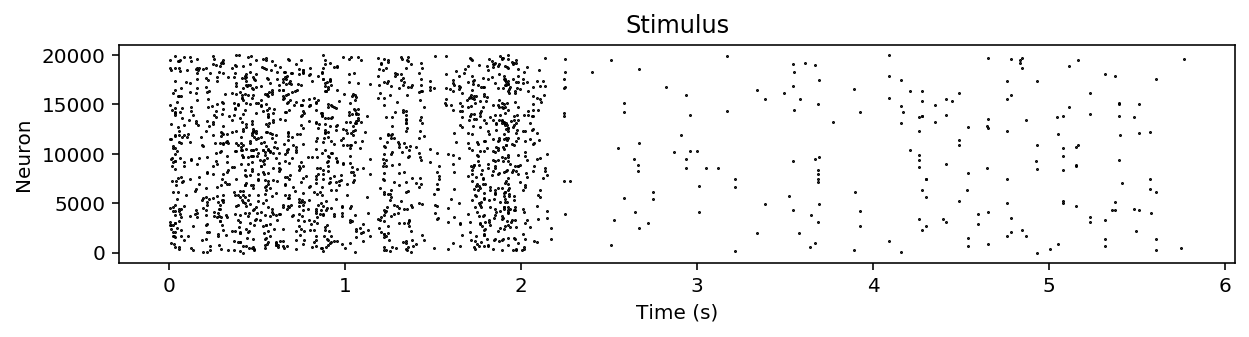

In [10]:
plt.figure(figsize=(10, 2))
plt.plot(*result["spikes"]["stim_p"], ".", markersize=1, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Neuron")
plt.title("Stimulus")

Text(0.5, 1.0, 'Stimulus')

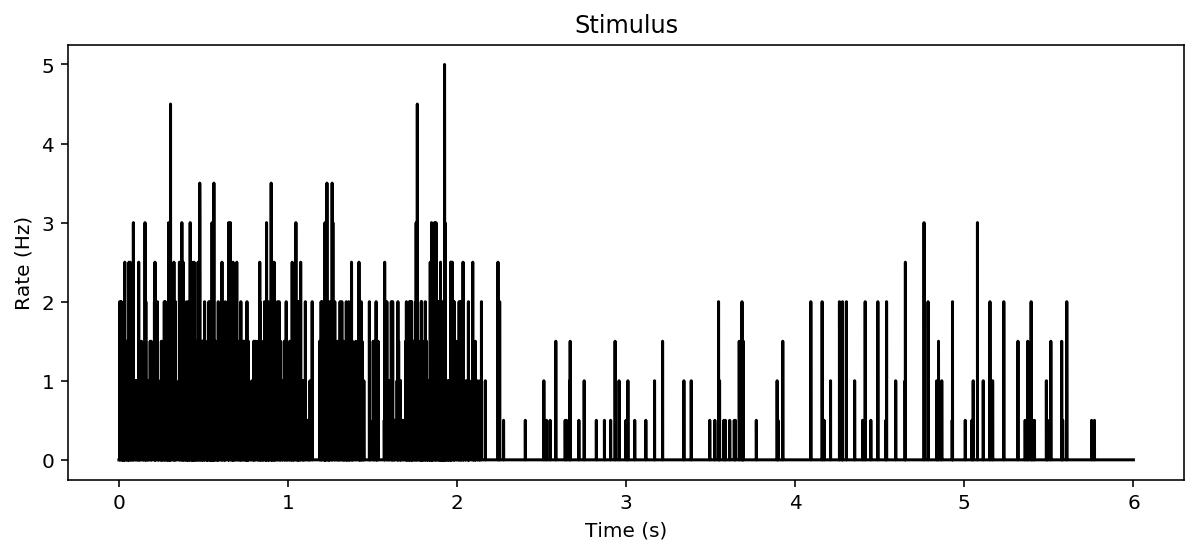

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(*result["rates"]["stim_p"], color="black")
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Stimulus")

(0, 6)

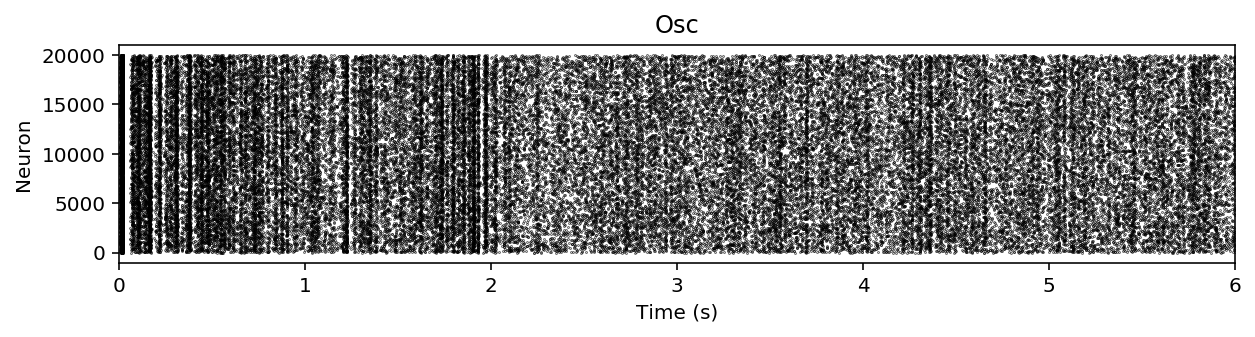

In [13]:
plt.figure(figsize=(10, 2))
plt.plot(*result["spikes"]["E"], ".", markersize=0.5, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Neuron")
plt.title("Osc")
plt.xlim(0, 6)

(0, 100)

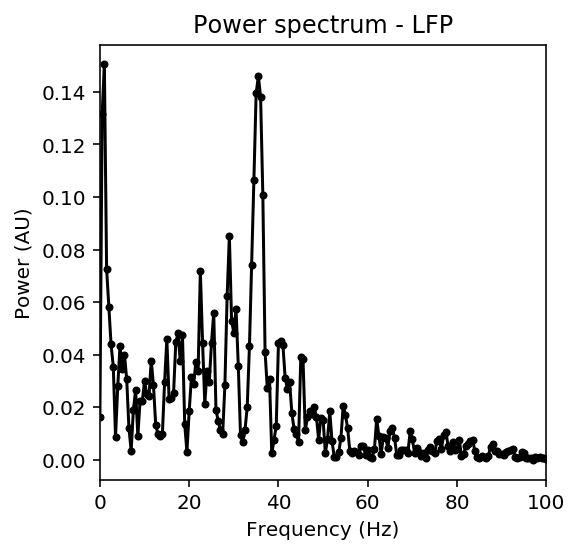

In [14]:
srate = result["srate"]

freqs, spectrum = compute_spectrum(
    result["lfp"]["lfp"],
    fs=srate,
    method="welch",
    avg_type="mean",
    nperseg=srate * 2,
)

plt.figure(figsize=(4, 4))
plt.plot(
    freqs,
    spectrum,
    ".-",
    color="black",
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (AU)")
plt.title("Power spectrum - LFP")
plt.xlim(0, 100)

Text(0.5, 1.0, 'Gamma filtered')

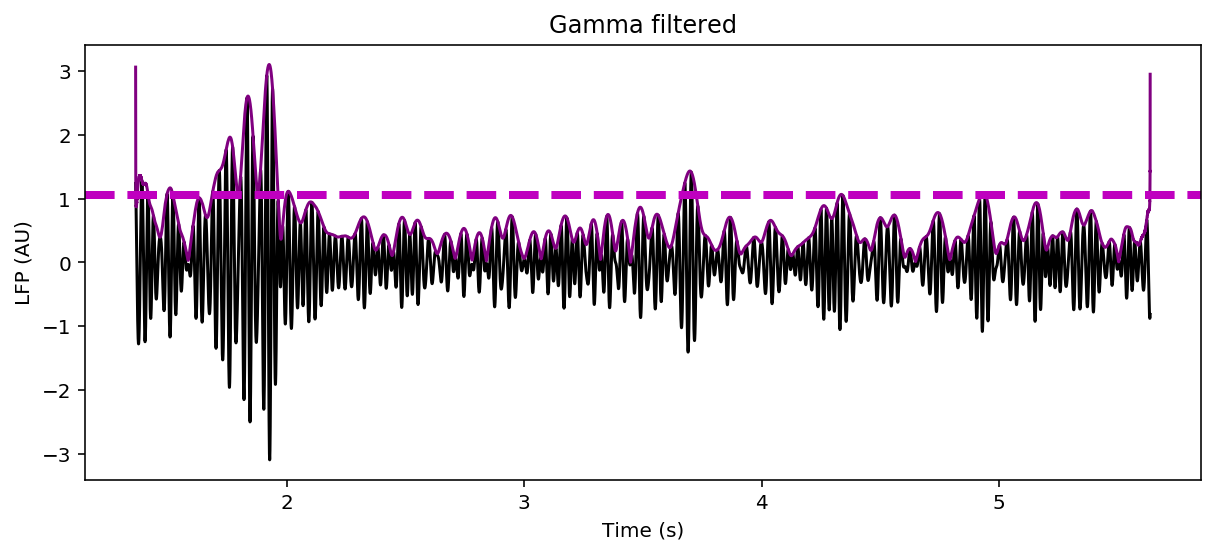

In [15]:
plt.figure(figsize=(10, 4))
plt.plot(
    result["lfp"]["lfp_gamma_times"],
    result["lfp"]["lfp_gamma"],
    color="black",
)
plt.plot(
    result["lfp"]["lfp_gamma_times"],
    result["lfp"]["lfp_gamma_hilbert"],
    color="purple",
)
plt.axhline(
    y=np.mean(result["lfp"]["lfp_gamma_hilbert"])
    + (1 * np.std(result["lfp"]["lfp_gamma_hilbert"])),
    linestyle="--",
    linewidth=4,
    color="m",
)
plt.xlabel("Time (s)")
plt.ylabel("LFP (AU)")
plt.title("Gamma filtered")

(1, 40)

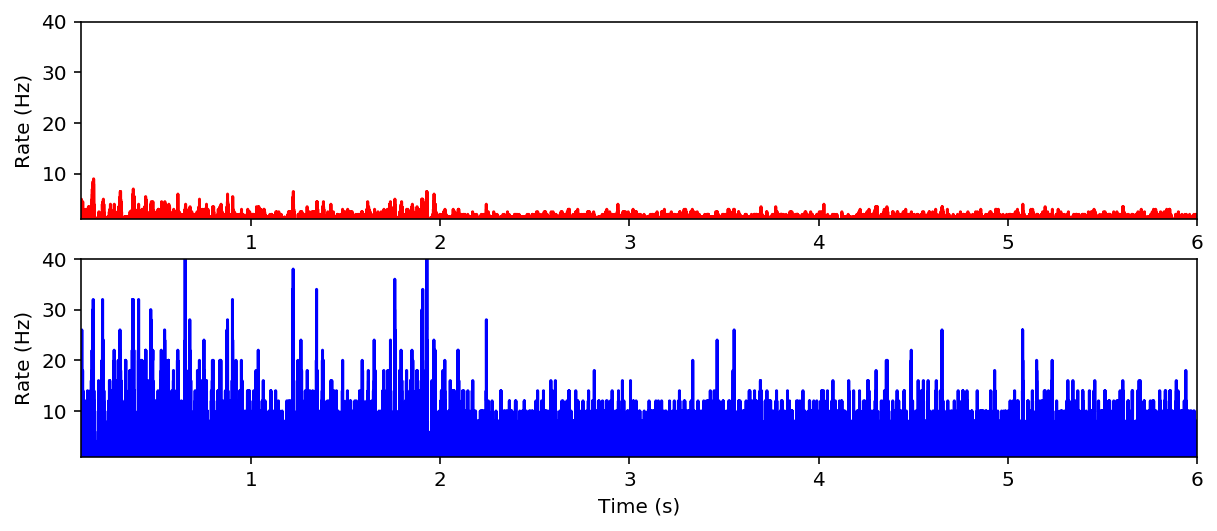

In [22]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(10, 4))
axes[0].plot(*result["rates"]["E"], color="red", label="E")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Rate (Hz)")
axes[0].set_xlim(0.1, 6)
axes[0].set_ylim(1, 40)
axes[1].plot(*result["rates"]["I"], color="blue", label="I")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Rate (Hz)")
axes[1].set_xlim(0.1, 6)
axes[1].set_ylim(1, 40)

Text(0, 0.5, 'Neuron')

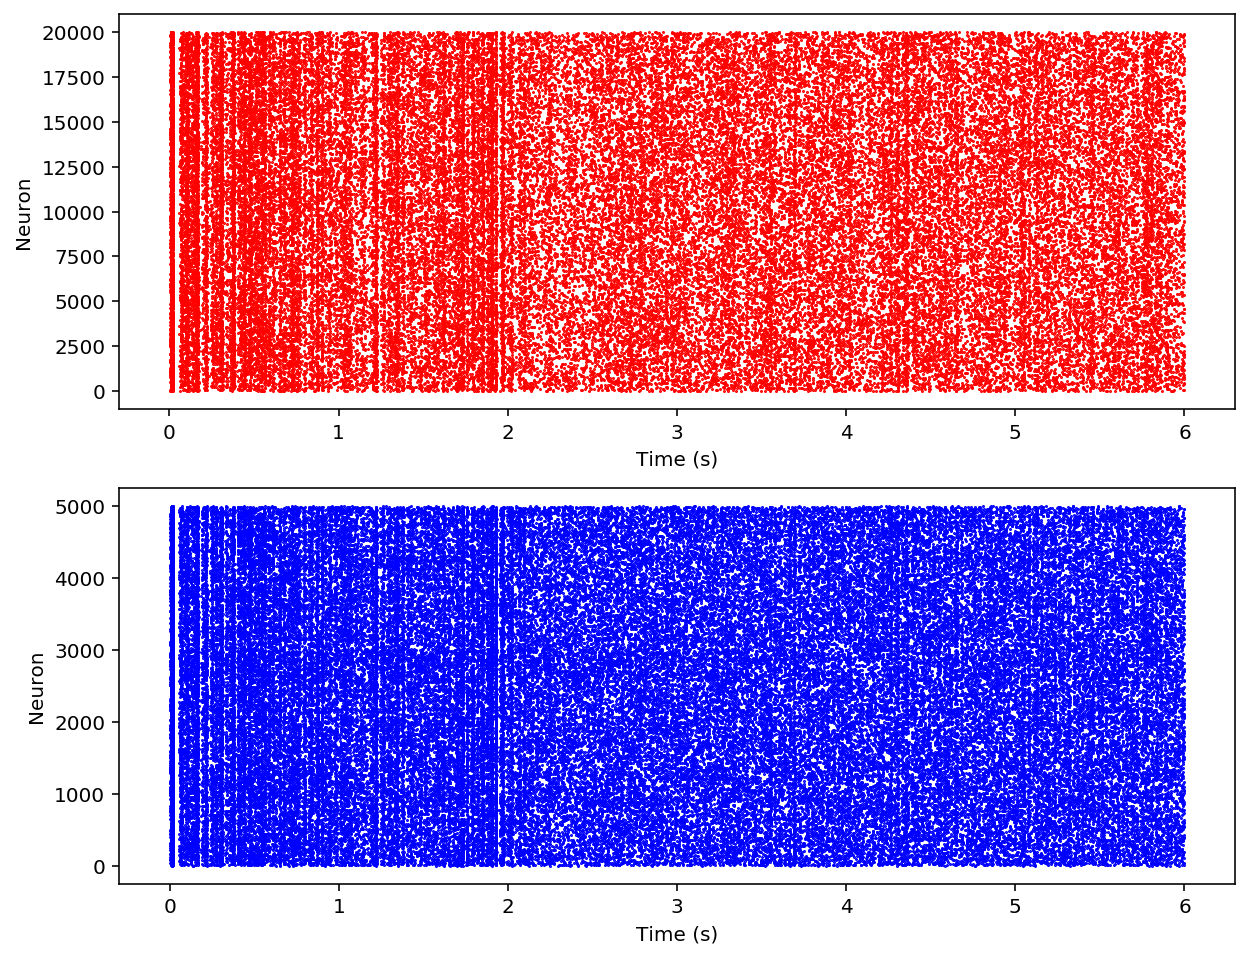

In [23]:
# plt.plot(spikemonIosc.t, spikemonIosc.i, ".", markersize=1, color="black")
fig, axes = plt.subplots(2, 1, sharey=False, figsize=(10, 8))
axes[0].plot(*result["spikes"]["E"], ".", markersize=1, color="red", label="E")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Neuron")
axes[1].plot(*result["spikes"]["I"], ".", markersize=1, color="blue", label="I")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Neuron")